<a href="https://www.kaggle.com/code/nguyendat255/vit-th?scriptVersionId=229928967" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1027_DFA_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1032_IEO_HAP_HI.wav
/kaggle/input/cremad/AudioWAV/1023_TIE_SAD_XX.wav
/kaggle/input/cremad/AudioWAV/1041_TAI_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1004_WSI_SAD_XX.wav
/kaggle/input/cremad/AudioWAV/1030_DFA_HAP_XX.wav
/kaggle/input/cremad/AudioWAV/1037_WSI_NEU_XX.wav
/kaggle/input/cremad/AudioWAV/1006_IOM_FEA_XX.wav
/kaggle/input/cremad/AudioWAV/1053_IEO_HAP_LO.wav
/kaggle/input/cremad/AudioWAV/1076_IEO_FEA_HI.wav
/kaggle/input/cremad/AudioWAV/1055_TSI_SAD_XX.wav
/kaggle/input/cremad/AudioWAV/1019_TIE_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1014_TAI_ANG_XX.wav
/kaggle/input/cremad/AudioWAV/1087_TIE_DIS_XX.wav
/kaggle/input/cremad/AudioWAV/1009_IWW_DIS_XX.wav


In [2]:
!git clone https://github.com/kjy7567/speech_emotion_recognition_from_log_Mel_spectrogram_using_vertically_long_patch.git

Cloning into 'speech_emotion_recognition_from_log_Mel_spectrogram_using_vertically_long_patch'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 57 (delta 3), reused 9 (delta 2), pack-reused 44 (from 2)
Receiving objects: 100% (57/57), 148.15 MiB | 43.28 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
%cd speech_emotion_recognition_from_log_Mel_spectrogram_using_vertically_long_patch

/kaggle/working/speech_emotion_recognition_from_log_Mel_spectrogram_using_vertically_long_patch


In [4]:
import torch
from model import Teacher

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define model parameters to match the pre-trained model
image_size = (128, 128)  # Adjust if necessary based on your data
patch_size = (8, 16)     # Adjusted to match patch_dim = 384
num_classes = 6
dim = 256
depth = 12
heads = 12               # Adjusted to match the checkpoint
mlp_dim = 256
channels = 1

# Initialize the model
model = Teacher(
    image_size=image_size,
    patch_size=patch_size,
    num_classes=num_classes,
    dim=dim,
    depth=depth,
    heads=heads,
    mlp_dim=mlp_dim,
    channels=channels
).to(device)

# Load pre-trained weights
checkpoint_path = '/kaggle/working/speech_emotion_recognition_from_log_Mel_spectrogram_using_vertically_long_patch/weight/teacher_92.64_CREMA_D.ckpt'
checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])

# Set model to evaluation mode
model.eval()

Using device: cuda


Teacher(
  (conv_stem): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): GELU(approximate='none')
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (5): GELU(approximate='none')
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (8): GELU(approximate='none')
    (9): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (11): GELU(approximate='none')
    (12): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_r

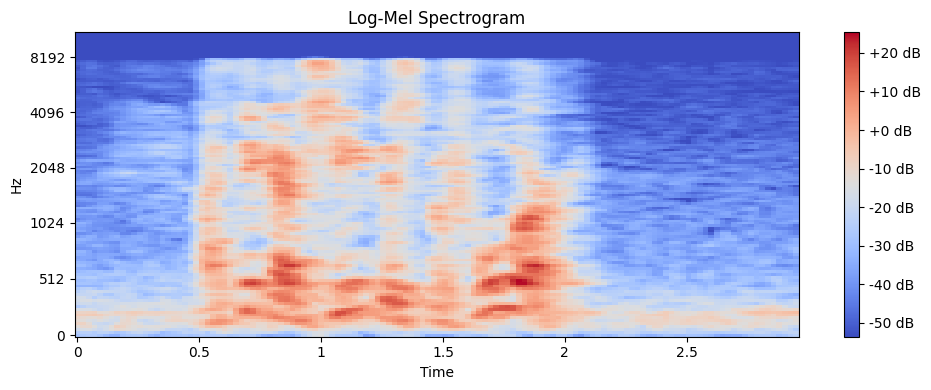

Predicted emotion: angry
Class probabilities: [[9.9889022e-01 2.5846255e-06 3.8270284e-07 8.8928509e-10 1.8474462e-06
  1.1049717e-03]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import librosa
import librosa.display

def extract_mel_spectrogram(audio_path, sr=22050, n_fft=2048, hop_length=512, n_mels=128):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Extract log Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, 
                                                    hop_length=hop_length, n_mels=n_mels)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    
    # Resize to model input size if needed
    if log_mel_spectrogram.shape != (image_size[0], image_size[1]):
        from skimage.transform import resize
        log_mel_spectrogram = resize(log_mel_spectrogram, image_size)
    
    return log_mel_spectrogram

def predict_emotion(audio_path, model, device):
    # Extract log Mel spectrogram
    log_mel = extract_mel_spectrogram(audio_path)
    
    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-Mel Spectrogram')
    plt.tight_layout()
    plt.show()
    
    # Preprocess for model input
    log_mel = torch.tensor(log_mel).unsqueeze(0).unsqueeze(0).float().to(device)
    
    # Get prediction
    with torch.no_grad():
        outputs, _ = model(log_mel)
        
    # Process outputs
    probabilities = torch.softmax(outputs, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()
    
    # Map predicted class to emotion (adjust based on your model's classes)
    emotions = ['angry', 'happy', 'neutral', 'sad']  # Example, modify based on your dataset
    
    return emotions[predicted_class], probabilities.cpu().numpy()

# Example usage
audio_path = '/kaggle/input/cremad/AudioWAV/1001_ITS_HAP_XX.wav'  # Replace with actual audio file
emotion, probs = predict_emotion(audio_path, model, device)
print(f"Predicted emotion: {emotion}")
print(f"Class probabilities: {probs}")

In [6]:
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import librosa
import librosa.display
from skimage.transform import resize

In [7]:
sys.path.append('/kaggle/working/speech_emotion_recognition_from_log_Mel_spectrogram_using_vertically_long_patch')
from model import Teacher, CustomDataset

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [9]:
# Define model parameters to match the pre-trained model
image_size = (128, 128)  # Kích thước spectrogram
patch_size = (8, 16)     # Kích thước patch
num_classes = 6          # Số lớp cảm xúc: angry, disgust, fear, happy, neutral, sad
dim = 256
depth = 12
heads = 12
mlp_dim = 256
channels = 1

# Initialize the model
model = Teacher(
    image_size=image_size,
    patch_size=patch_size,
    num_classes=num_classes,
    dim=dim,
    depth=depth,
    heads=heads,
    mlp_dim=mlp_dim,
    channels=channels
).to(device)

# Load pre-trained weights
weight_dir = '/kaggle/working/speech_emotion_recognition_from_log_Mel_spectrogram_using_vertically_long_patch/weight'
checkpoint_path = os.path.join(weight_dir, 'teacher_92.64_CREMA_D.ckpt')

if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=False)
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Loaded pre-trained weights from {checkpoint_path}")
else:
    print(f"Checkpoint not found at {checkpoint_path}. Please check the path or train the model from scratch.")

# Set model to evaluation mode for inference
model.eval()

Loaded pre-trained weights from /kaggle/working/speech_emotion_recognition_from_log_Mel_spectrogram_using_vertically_long_patch/weight/teacher_92.64_CREMA_D.ckpt


Teacher(
  (conv_stem): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (2): GELU(approximate='none')
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (5): GELU(approximate='none')
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (8): GELU(approximate='none')
    (9): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (11): GELU(approximate='none')
    (12): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_r

In [10]:
def extract_mel_spectrogram(audio_path, sr=22050, n_fft=2048, hop_length=512, n_mels=128, image_size=(128, 128)):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Extract log Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, 
                                                    hop_length=hop_length, n_mels=n_mels)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    
    # Resize to model input size if needed
    if log_mel_spectrogram.shape != image_size:
        log_mel_spectrogram = resize(log_mel_spectrogram, image_size)
    
    return log_mel_spectrogram

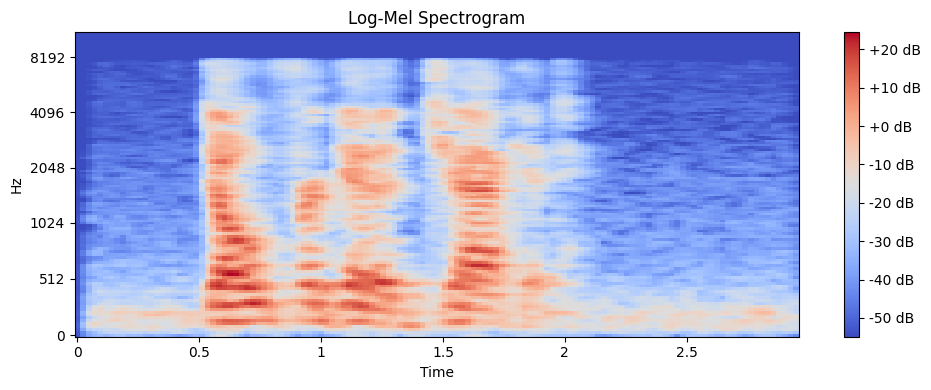

Predicted emotion: angry
Class probabilities: [[9.9989843e-01 5.2006743e-07 4.8146012e-07 1.1529713e-09 8.6451496e-07
  9.9728517e-05]]


In [11]:
def predict_emotion(audio_path, model, device, image_size=(128, 128)):
    # Extract log Mel spectrogram
    log_mel = extract_mel_spectrogram(audio_path, image_size=image_size)
    
    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-Mel Spectrogram')
    plt.tight_layout()
    plt.show()
    
    # Preprocess for model input
    log_mel = torch.tensor(log_mel).unsqueeze(0).unsqueeze(0).float().to(device)  # Shape: (1, 1, H, W)
    
    # Get prediction
    with torch.no_grad():
        outputs, _ = model(log_mel)
        
    # Process outputs
    probabilities = torch.softmax(outputs, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()
    
    # Map predicted class to emotion
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
    
    return emotions[predicted_class], probabilities.cpu().numpy()

# Dự đoán cảm xúc trên một file âm thanh
audio_path = '/kaggle/input/cremad/AudioWAV/1001_DFA_ANG_XX.wav'
emotion, probs = predict_emotion(audio_path, model, device)
print(f"Predicted emotion: {emotion}")
print(f"Class probabilities: {probs}")